# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Riky Raharjo
- **Email:** rikyraharjo112@gmail.com
- **ID Dicoding:** Riky Raharjo

## Menentukan Pertanyaan Bisnis
- Kapan waktu tersibuk penyewaan sepeda dalam setahun? Musim apa yang paling banyak digunakan?
- Bagaimana pengaruh suhu dan cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Wrangling

### Gathering Data

In [2]:
# menghubungkan dengan drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/DICODING COURSE/Analisis Data dengan Pyhton/Project Akhir/day.csv'
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


### Cleaning Data

In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['season_label'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weekday_label'] = df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
df['year'] = df['yr'].map({0: 2011, 1: 2012})
df['weather_label'] = df['weathersit'].map({
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan Ringan',
    4: 'Cuaca Ekstrem'
})

## Exploratory Data Analysis (EDA)

In [6]:
df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Waktu tersibuk penyewaan sepeda dan musim terpadat

<ipython-input-7-71441267>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season_label', y='cnt', estimator=sum, palette='Set2')


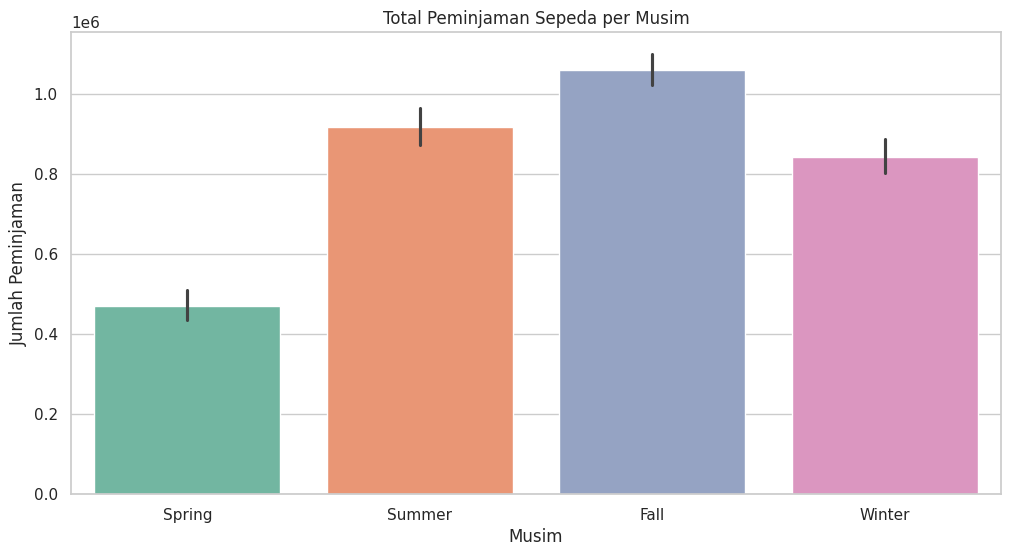

In [7]:
sns.barplot(data=df, x='season_label', y='cnt', estimator=sum, palette='Set2')
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

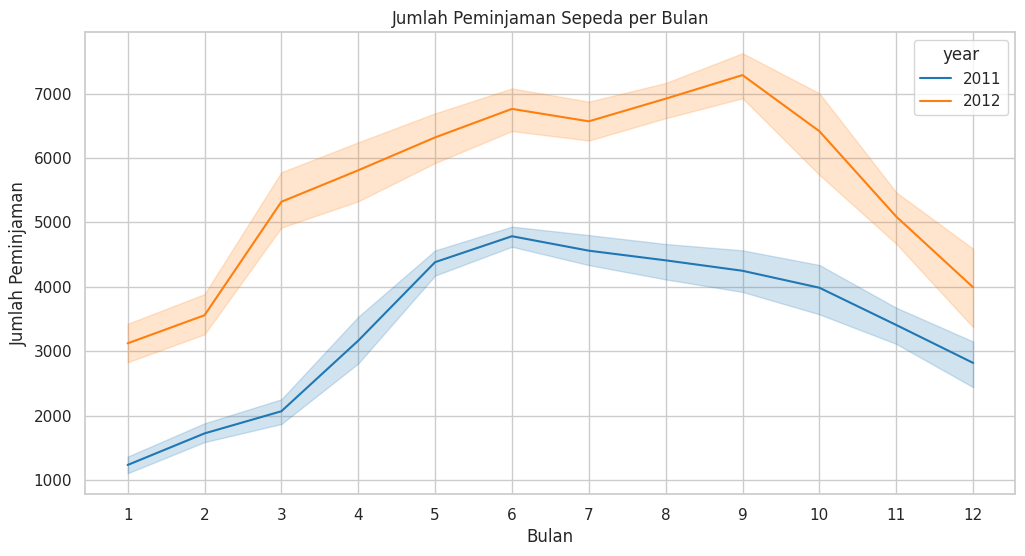

In [8]:
sns.lineplot(data=df, x='mnth', y='cnt', hue='year', palette='tab10')
plt.title('Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(1,13))
plt.show()

### Pertanyaan 2: Pengaruh suhu dan cuaca terhadap jumlah penyewaan

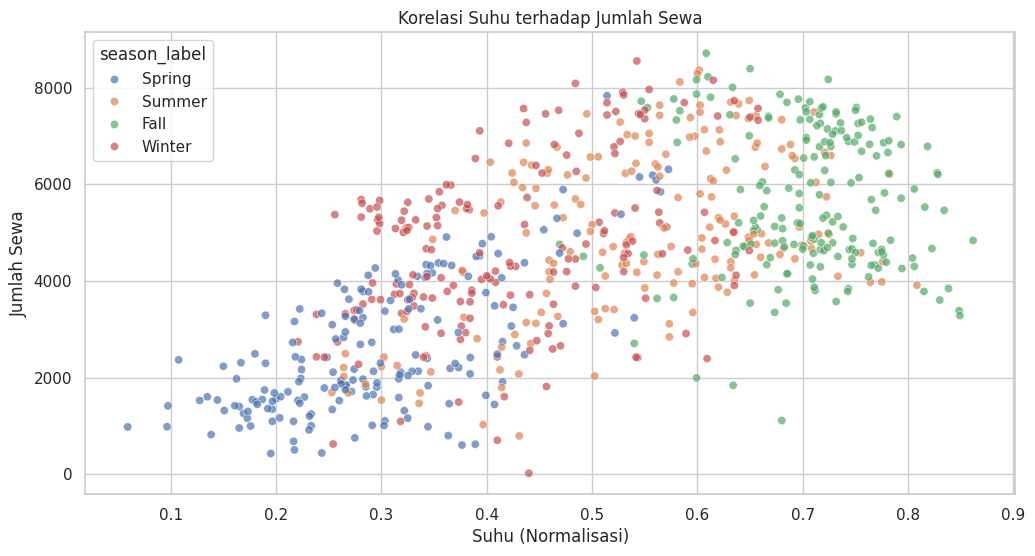

In [9]:
sns.scatterplot(data=df, x='temp', y='cnt', hue='season_label', alpha=0.7)
plt.title('Korelasi Suhu terhadap Jumlah Sewa')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Sewa')
plt.show()

<ipython-input-10-3538610197>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_label', y='cnt', palette='Set3')


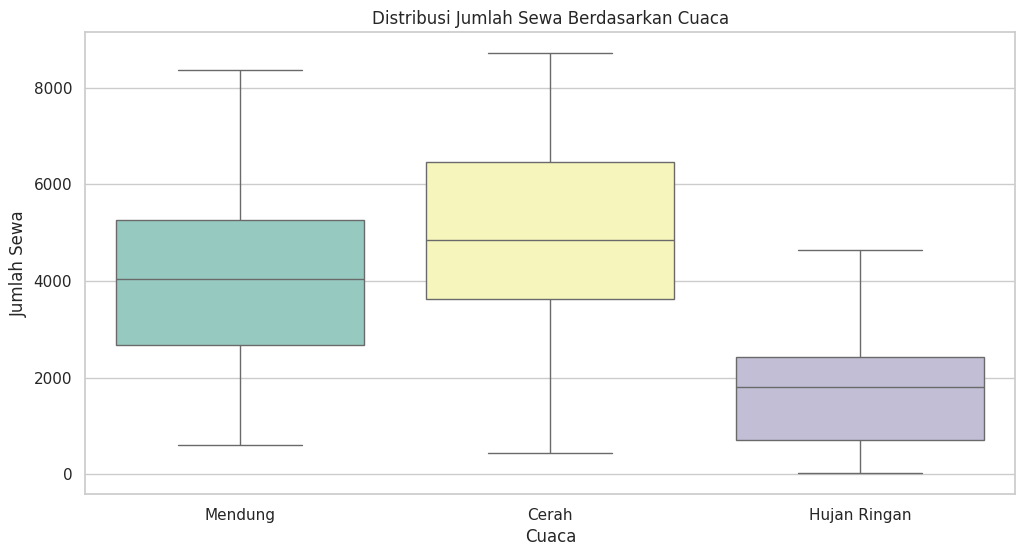

In [10]:
sns.boxplot(data=df, x='weather_label', y='cnt', palette='Set3')
plt.title('Distribusi Jumlah Sewa Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion
1. Jumlah penyewaan sepeda paling tinggi terjadi saat musim **Fall** dan **Summer**.
2. Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda.
3. Cuaca buruk seperti hujan ringan dan ekstrem secara signifikan menurunkan jumlah penyewaan.